# 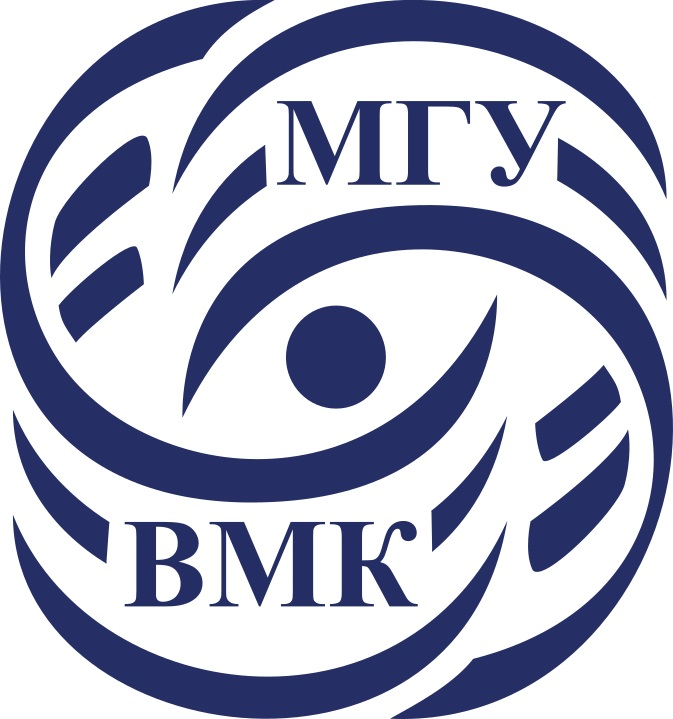

# Машинное обучение. ВМК МГУ

## Практическое задание 4: Линейные модели, часть 1: Регрессия

### Важно! О формате сдачи

* Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
При выполнении данного задания необходимо последовательно запустить все ячейки ноутбука и ответить на $11$ вопросов. Ответы на вопросы будут проверены в рамках кросс-ревью. Всего за ответы на вопросы можно получить $20$ баллов.

### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)


In [4]:
# !!! Данный блок будет работать только в Google-Colab !!!
# Устанавливаем урезанную версию requirements.txt для ускорения установки
# Если будут всплывать ошибки о несовместимости библиотек, то ничего страшного
# На это задание они не влияют

! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
! pip install -r /content/requirements_small.txt

Downloading...
From: https://drive.google.com/uc?id=1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
To: /content/requirements_small.txt
100% 374/374 [00:00<00:00, 1.16MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Линейная регрессия

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека scikit-learn (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

Так как мы будем обучать линейную регрессию, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
- Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim \mathcal{N}(0, 0.01)$.

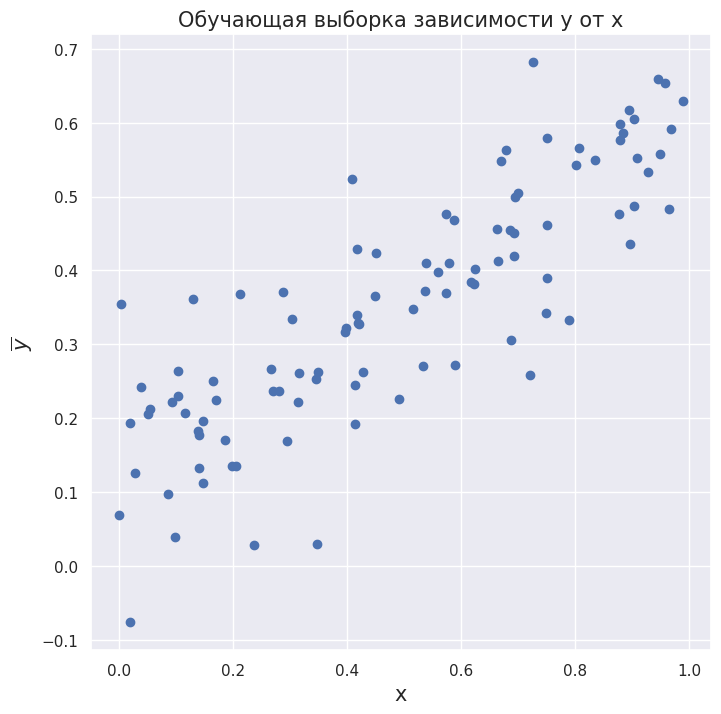

In [7]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Обучим линейную регрессию, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки sklearn коэффициент регуляризации задаётся параметром alpha

In [10]:
from sklearn.linear_model import Ridge

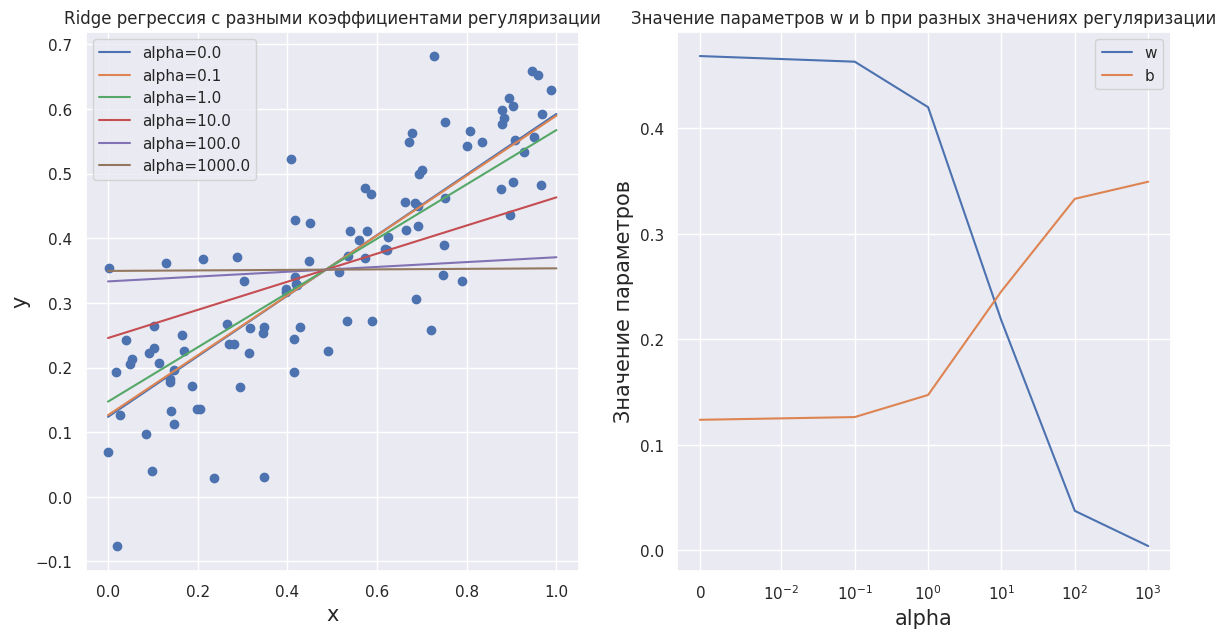

In [11]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

### **Вопрос 1** (1 балл)

Как зависят параметры модели от константы регуляризации? А качество?


**Ответ**: Параметры модели наиболее близки к истинным значениям, по которым была построена выборка (w = 0.5, b = 0.1), когда коэф. регуляризации наименьший (т.е. качество модели здесь наилучшее при отстутствии регуляризации). <br>
Чем больше константа регуляризации, тем ближе предсказываемое значение к константе (и правда, ведь с большим коэффициентом регуляризации оптимальным является не сокращать MSE, а снижать наклон кривой в ноль). <br>
Общая тенденция такова: наклон кривой снижается при повышении коэф-та регуляризации, качество модели снижается с повышением коэф-та регуляризации.

### **Вопрос 2** (1 балл)

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции и увиденные картинки.

**Ответ:** Пусть модель включает регуляризацию параметра b, коэф-т b при этом неизвестен. Тогда модель старается свести коэф-т b к нулю или еще какому-то случайно заданному нами значению (если регуляризует, например, модуль b) или, что еще хуже, пытается сделать коэф-т b еще меньше вне зависимости от его истинного значения. Так модель становится хуже.<br>
Дело в том, что интерсепт не содержит никакой информации, но при этом его регуляризация приводит к изменению в действительно важных параметрах (w), делая качество модели хуже. <br>
*ВАЖНОЕ ЗАМЕЧАНИЕ*: если всё же известно истинное значение интерсепта (у нас это 0.1), то подгонка модели под этот параметр действительно может улучшить качество модели (см. параметр fit_intercept в моделях в sklearn). Но если истинное значение интерсепта неизвестно, то его регуляризация не имеет смысла.

------

Казалось бы, зачем нам эта глупая регуляризация?!

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [12]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.1006220738265918 	w2: 0.20124414765318363


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [13]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.348 	w2: -6814478528879.28


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими. Создадим обучающую выборку из того же распределения и посмотрим на качество

In [14]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0209


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [15]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705892708396
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных приводит к резкому падению качества.

### **Вопрос 3** (2 балла)
Рассмотрите больше примеров с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [16]:
# Creating "train" data
for i in [1,2,3]:
    print(f"Test {i}")
    np.random.seed(i)
    X = np.random.uniform(0, 1, 100)
    X3 = np.hstack((X[:, None], 5 * X[:, None]))  # features are linearly dependent: x2 = 5 * x1
    Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

    # Setting the model
    reg = Ridge(alpha=0.0)
    reg.fit(X3, Y3)
    print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

    # Creating "test" data plus calculating true values of the target
    X3_test = np.random.uniform(0, 1, 10)
    X3_test = np.hstack((X3_test[:, None], 5 * X3_test[:, None]))
    Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(10) * 0.1

    Y3_test_pred = np.sum(reg.coef_[np.newaxis] * X3_test + reg.intercept_, axis=1)
    print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
    print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

    # Let's add a little bit of noise
    # To only ONE object, to only ONE feature - the first (zeroth) feature
    X3_test[0, 1] = X3_test[0, 1] + 0.000000001
    Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
    print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
    print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
    print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])
    print("\n")

Test 1
w1: 5486170849818.356 	w2: -1097234169963.5773
w1: 5486170849818.356 	w2: -1097234169963.5773
MSE loss: 0.0115
MSE loss: 120358.66226150081
Предсказание для первого объекта с шумом:  -1096.9841918945312
Предсказание для первого объекта без шума:  0.249969482421875


Test 2
w1: 24776240017550.676 	w2: -4955248003510.0205
w1: 24776240017550.676 	w2: -4955248003510.0205
MSE loss: 0.0137
MSE loss: 2455441.6182477353
Предсказание для первого объекта с шумом:  -4954.59765625
Предсказание для первого объекта без шума:  0.65234375


Test 3
w1: 21995100477408.777 	w2: -4399020095481.668
w1: 21995100477408.777 	w2: -4399020095481.668
MSE loss: 0.0183
MSE loss: 1935012.280104511
Предсказание для первого объекта с шумом:  -4398.5947265625
Предсказание для первого объекта без шума:  0.42578125




-----

Теперь добавим регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

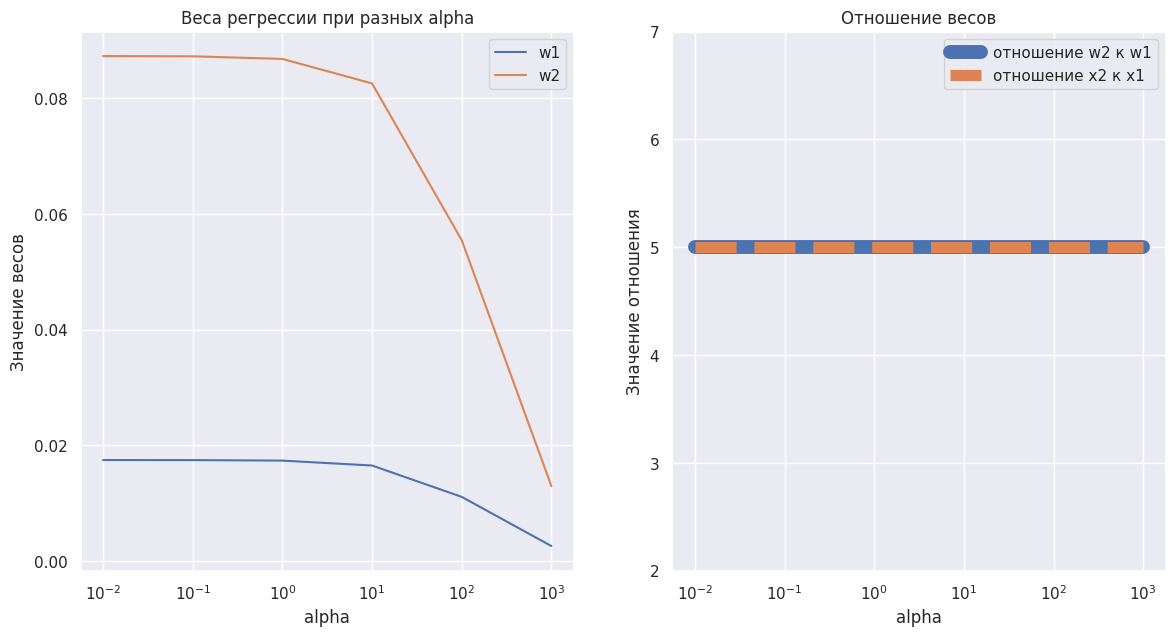

In [17]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [5, 5], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2, 7)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### **Вопрос 4** (2 балла)

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

**Ответ:** <br>
Функция потерь, которую оптимизируем (согласно описанию Ridge sklearn):<br> $Q(w) = \sum_{i=1}^l(𝙖(x_i,w) - y_i)^2 \:+\: α||w||^2$ <br>
С условиями оптимальности:
$$\frac{∂Q}{∂w_1}(w) = 2\sum_{i=1}^l\left[(𝙖(x_i,w) - y_i)\frac{∂𝙖(x_i,w)}{∂w_1}\right] \:+\: 2αw_1 = 0$$
$$\frac{∂Q}{∂w_2}(w) = 2\sum_{i=1}^l\left[(𝙖(x_i,w) - y_i)\frac{∂𝙖(x_i,w)}{∂w_2}\right] \:+\: 2αw_2 = 0$$
$$𝙖(x_i,w) = w_1x_1 + w_2x_2 + b \;\;\; => $$
$$=> \frac{∂Q}{∂w_1}(w) = 2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i1} \:+\: 2αw_1 = 0$$
$$\frac{∂Q}{∂w_2}(w) = 2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i2} \:+\: 2αw_2 = 0 =>$$

$$=> 2αw_1 = 2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i1} \;\; (1)$$
$$2αw_2 = 2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i2} \;\; (2)$$
Делим (1) на (2). Получаем: $$\frac{w_1}{w_2} = \frac{2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i1}}{2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i2}}$$
Можно заметить, что результат не зависит от $α$. При $α = 0$ доопределяем по непрерывности. $\;\;\;\;\;\;\;\;\;\;\;\;\blacksquare$

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### **Вопрос 5** (2 балла)

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

**Ответ**: Функция потерь, которую оптимизируем (согласно описанию Lasso sklearn):<br>
$Q(w) = \frac{1}{2\,*\,n\_samples}\sum_{i=1}^l(𝙖(x_i,w) - y_i)^2 \:+\: α||w||_{L_1}$  &nbsp;&nbsp;, где $||w||_{L_1}$ - L1-норма вектора $w$ <br>
Пусть $w1, w2 \neq 0$

$$\frac{∂Q}{∂w_1}(w) = \frac{1}{n\_samples}\sum_{i=1}^l\left[(𝙖(x_i,w) - y_i)\frac{∂𝙖(x_i,w)}{∂w_1}\right] \:+\: α*sgn(w_1)$$

$$\frac{∂Q}{∂w_2}(w) = \frac{1}{n\_samples}\sum_{i=1}^l\left[(𝙖(x_i,w) - y_i)\frac{∂𝙖(x_i,w)}{∂w_2}\right] \:+\: α*sgn(w_2)$$

$$𝙖(x_i,w) = w_1x_1 + w_2x_2 + b \;\;\; => $$

$$=> \frac{∂Q}{∂w_1}(w) = \frac{1}{n\_samples}\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i1} \:+\: α*sgn(w_1)$$

$$\frac{∂Q}{∂w_2}(w) = \frac{1}{n\_samples}\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i2} \:+\: α*sgn(w_2)$$

Видно, что частные производные $\frac{∂Q}{∂w_i}(w), \;i=1,2$
получают дополнительное слагаемое в виде $α*sgn(w_i),\; α>0$ <br> Данный член положителен, если $w_i$ положительно, и отрицателен, если $w_i$ отрицательно. Это значит, что данные слагаемые вносят вклад в вектор антиградиента, направляя его в сторону нуля $w_i$, делая отрицательный $w_i$ больше, а положительный - меньше. Кстати, модуль в нуле недифференцируем. Но даже достаточно несложным алгоритмам это, однако, не страшно.




-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [18]:
from sklearn.linear_model import Lasso

In [19]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.031050581770728072

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.08477491109419943

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.09014734402654657

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.0906845873197813

Веса, при alpha = 0.00001
w1: 0.334304159748978 	w2: 0.02387747969930916



### **Вопрос 6** (2 балла)

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

**Подсказка** Обратите внимание на то, каким странным получился вес $w_2$

**Ответ**: обратим внимание на спецификацию параметров класса class sklearn.linear_model.Lasso(alpha=1.0, \*, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, **selection='cyclic'**). <br>
Внимание на последний аргумент. cyclic, параметр по умолчанию, влияет на fit так: алгоритм, заложенный в fit, циклически проходит по features, что влияет на скорость сходимости алгоритма. Можно задать параметр selection='random', и тогда мы можем говорить не только о гарантированной сходимости, но и о более быстрой сходимости. <br>
Проверим наше предположение:

In [58]:
print("При selection='cyclic'")
reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("\nПри selection='random'")
reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4, selection='random')
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("\nА если просто увеличить количество итераций?..")

reg = Lasso(alpha=0.00001, max_iter=10000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])


При selection='cyclic'
Веса, при alpha = 0.00001
w1: 0.334304159748978 	w2: 0.02387747969930916

При selection='random'
Веса, при alpha = 0.00001
w1: 0.0 	w2: 0.09073831164910477

А если просто увеличить количество итераций?..
Веса, при alpha = 0.00001
w1: 0.0 	w2: 0.09073831164910494


Сработало. Мы видим, что проблема крылась в циклической работе алгоритма. <br> В алгоритмах оптимизации стоит выбирать случайные объекты выборки!

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### **Вопрос 7** (2 балла)

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

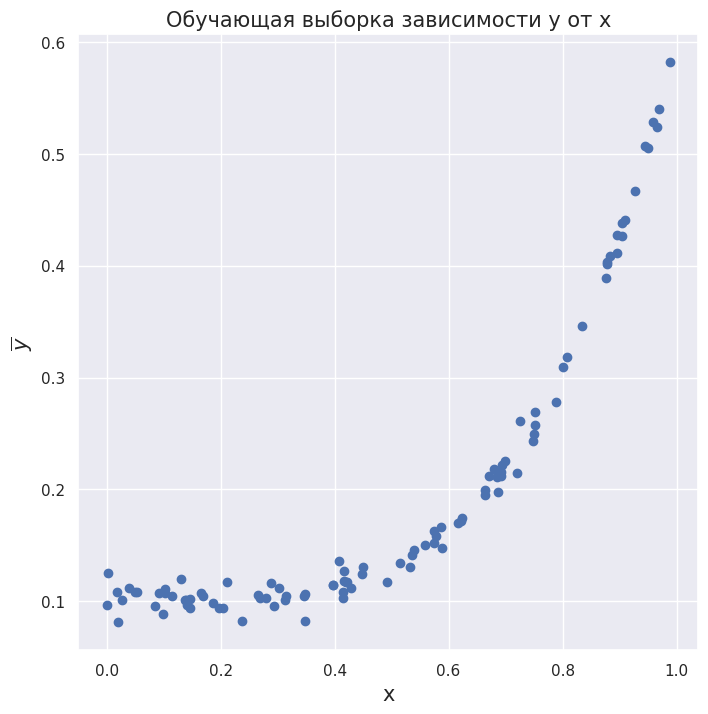

In [85]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X**4 * 0.5 + 0.1 + np.random.randn(100) * 0.01  # y зависит от x в степени 4

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Попробуем LASSO, Ridge с разной регуляризацией

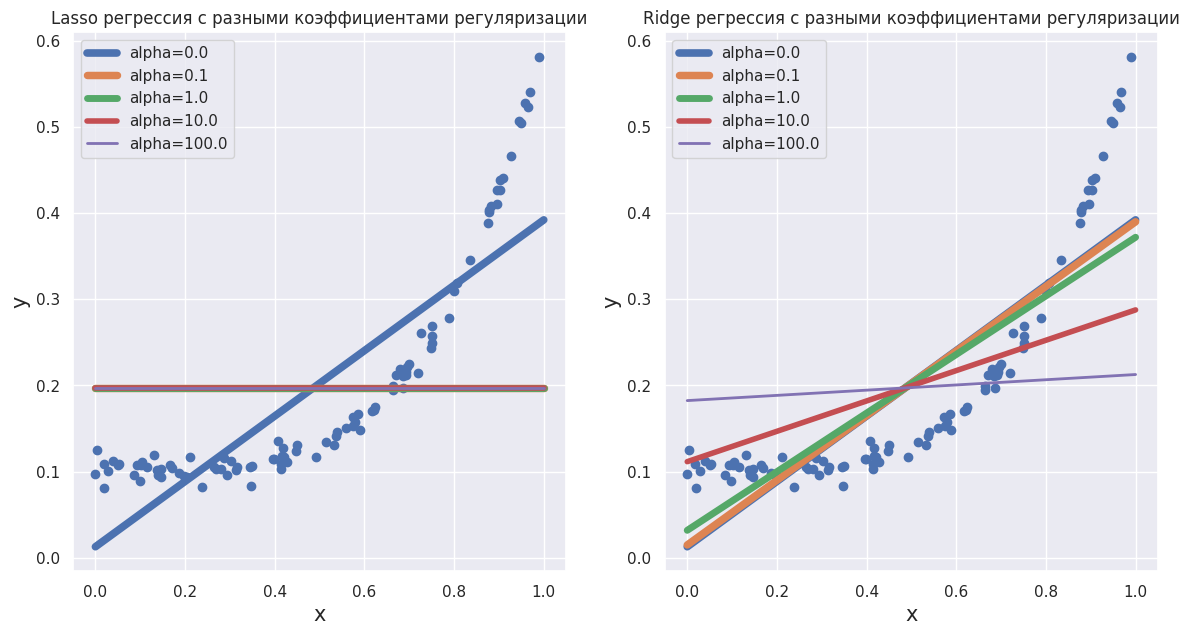

In [103]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)
axs[1].scatter(X, Y)


alphas = [0.0, 0.1, 1.0, 10.0, 100.0]
models = [Lasso, Ridge]

for i in [0, 1]:
    axs[i].set_xlabel("x", size=15)
    axs[i].set_ylabel("y", size=15)
    axs[i].set_title(f"{type(models[i]()).__name__} регрессия с разными коэффициентами регуляризации")
    for alpha in alphas:
        reg = models[i](alpha=alpha)
        reg.fit(X[:, None], Y)
        pred = reg.predict(x_axis[:, None])
        axs[i].plot(x_axis, pred, label="alpha=" + str(alpha), linewidth = 6 - (alpha + 0.1)**0.3)
    axs[i].legend()

plt.show()

И близко не похоже...

-------------

Попробуем обучить линейную регрессию c $l_1$ регуляризацией на специальном датасете из sklearn

In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [105]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.871  28.668  5.438  1.097  1423.264  3.116  35.621 -119.558]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [106]:
from sklearn.preprocessing import StandardScaler

### **Вопрос 8** (2 балла)

Отмасштабируйте данные при помощи класса StandardScaler. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

**Замечание:** Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [116]:
#Ваш ответ

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Натягиваем скейлер на данные из train и трансформируем их
X_test_scaled = scaler.transform(X_test)  # Применяем скейлер, натянутый на train, к test

Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [120]:
from sklearn.metrics import mean_squared_error

In [123]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9780


In [209]:
print("train var: ", X_train_scaled.var(axis=0))
print("test var: ", X_test_scaled.var(axis=0))
print("train mean: ", X_train_scaled.mean(axis=0))
print("test mean: ", X_test_scaled.mean(axis=0))


train var:  [1. 1. 1. 1. 1. 1. 1. 1.]
test var:  [1.04232987 0.98581472 1.33209427 1.21021935 0.96038642 0.06195302
 1.00896771 1.01131205]
train mean:  [-6.41568747e-15  3.04297008e-17  1.19356928e-14 -2.24111673e-16
 -9.92077406e-17 -1.22618655e-15 -3.45598411e-14  2.75281213e-14]
test mean:  [-0.00035668 -0.00765929 -0.01236862 -0.00116823  0.00647308 -0.01223974
  0.01619917 -0.01925281]


### **Вопрос 9** (1 балл)

В чем плюсы RMSE по сравнению с MSE?

$RMSE = \sqrt{MSE}$ <br>
RMSE более интерпретируем. RMSE, в отличие от MSE, представлен в тех же единицах, что и исходные данные. В остальном, я бы не сказал, что RMSE сильно отличается от MSE, ведь они взаимно однозначно восстанавливаются друг по другу.

### **Вопрос 10** (1 балл)

Насколько удачно измерять качество модели с помощью RMSE с учетом того, что оптимизация линейной регрессии происходит по MSE?

**Ответ** Даже несмотря на то, что здесь имеем дело с L1-регуляризацией, и ответ "Неважно, что оптимизируем: само значение или его корень", который имел бы место в случае без регуляризации, может не прокатить, я склоняюсь к мнению, что *неважно*, какая метрика - MSE или RMSE - ведь они положительные и взаимно однозначно восстанавливаются друг по другу. <br>
В случае с MSE более очевидна связь с тем, насколько член, отвечающий, за регуляризацию, получился большим. В случае с RMSE просто лучше интерпретируемость.

-----

Проанализируем ошибку на обучающей выборке.

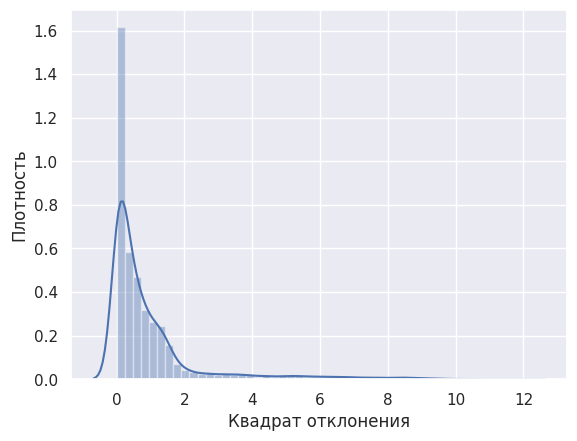

In [139]:
error = (y_train - reg.predict(X_train_scaled)) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Как видно, есть несколько объектов, на которых модель ошибается сильно. Давайте посмотрим на качество, если удалить эти объекты из обучающей выборки.

In [140]:
mask = (error < np.quantile(error, 0.99))
reg.fit(X_train_scaled[mask], y_train[mask])
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.9717


Таким образом, можно улучшить качество линейной регрессии, если удалить из обучающей выборки выбросы. В данном примере, качество улучшилось не так сильно, но бывают ситуации, когда чистка обучающей выборки по ошибке приводит к сильному улучшению качества.

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [141]:
reg.coef_

array([ 0.30658523,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [142]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 0.82540051  0.12701227 -0.24066504  0.27101941 -0.00317096 -0.04117445
 -0.87312407 -0.84556157]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

### **Вопрос 11** (2 балла)

Приведите пример, когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак?

**Ответ:**
Приведем **3** примера:

Ответ: Во-первых, это произойдет, когда $α → ∞$. <br> Но это слишком теоретический пример. Приведем нечто конкретное (пример 2 из 3):
Вспоминаем формулу, выведенную нами ранее:
$$\frac{∂Q}{∂w_2}(w) = 2\sum_{i=1}^l(w_1x_{i1} + w_2x_{i2} + b - y_i)x_{i2} \:+\: 2αw_2 = 0$$
Кажется, что если выбрать малые значения одного из признаков $x$ и достаточно большой alpha, должно произойти зануление **соответствующего этому признаку весового коэффициента**. <br> Проверим эту гипотезу:

In [167]:
np.random.seed(1)
X1 = np.random.uniform(0, 1, 100)
X2 = np.random.uniform(0, 0.000001, 100)  # Признак, вносящий очень малый вклад

np.random.seed(1)
X3 = np.hstack((X1[:, None], X2[:, None]))  # ЛНЗ признаки
Y3 = X3[:, 0] + X3[:, 1] + np.random.randn(100) * 0.1

print("Без регуляризации")
reg = Ridge(alpha=0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("Регуляризация: alpha = 1")
reg = Ridge(alpha=1)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("Регуляризация: alpha = 100")
reg = Ridge(alpha=100)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

Без регуляризации
w1: 1.0022385440880184 	w2: -32639.079702799525
Регуляризация: alpha = 1
w1: 0.8993463299145155 	w2: -3.502266041751108e-07
Регуляризация: alpha = 100
w1: 0.08000743174658678 	w2: -5.39906766717594e-09


Видно (особенно на примере 2), что вес w2 пренебрежимо мал по сравнению с весом w1, и он соответствует именно пренебрежимо малому признаку x2. Таким образом, гипотеза оказалась верной.

Еще пример (3 из 3): **неинформативный признак** и соответствующий ему вес:

In [172]:
np.random.seed(1)
X1 = np.random.uniform(0, 1, 10000)
X2 = np.random.uniform(0, 1, 10000)  # Признак, не вносящий вообще никакой информации

np.random.seed(1)
X3 = np.hstack((X1[:, None], X2[:, None]))  # ЛНЗ признаки
Y3 = X3[:, 0]  + np.random.randn(10000) * 0.1  # Используем только признак 1. Ожидаем зануления коэф-та w2.
print("Без регуляризации")
reg = Ridge(alpha=0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("Регуляризация: alpha = 1")
reg = Ridge(alpha=1)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

print("Регуляризация: alpha = 100")
reg = Ridge(alpha=100)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

Без регуляризации
w1: 1.001297939370623 	w2: -0.0034345482330075013
Регуляризация: alpha = 1
w1: 1.0000893926235275 	w2: -0.0034156858216272644
Регуляризация: alpha = 100
w1: 0.8933444541999004 	w2: -0.0018886223599142093


И правда, коэф-т w2 оказался пренебрежимо мал по сравнению с w1. <br>
Таким образом, все высказанные предположения оказались верны.

------

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью кросс-валидации. В sklearn есть несколько классов со встроенной кросс-валидацией

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### Вопрос 12 (2 балла)

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


**Подсказка:**
* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

**Замечание:** Итоговое качество должно быть не больше 0.73 RMSE.

In [178]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [198]:
model_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Lasso())
])

model_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("regr", Ridge())
])

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": np.logspace(-3, 3, 10)}
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring="neg_root_mean_squared_error",
    param_grid = {"regr__alpha": np.logspace(-3, 3, 10)}
)

# Your code: фитим модели и измеряем качество на тесте
lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
# Можно вызывать predict прямо от обученных lasso_cv и ridge_cv
scores_lasso = lasso_cv.cv_results_
scores_ridge = ridge_cv.cv_results_
best_score_lasso = lasso_cv.score(X_test, y_test)
best_score_ridge = ridge_cv.score(X_test, y_test)

In [199]:
scores_lasso

{'mean_fit_time': array([0.03443813, 0.03154044, 0.02515612, 0.00849767, 0.00716543,
        0.01551991, 0.01792536, 0.01878939, 0.01244602, 0.00714207]),
 'std_fit_time': array([0.01095432, 0.00140071, 0.00585888, 0.00121377, 0.00037987,
        0.00521471, 0.00109115, 0.00063375, 0.00615601, 0.00024828]),
 'mean_score_time': array([0.00340877, 0.0028338 , 0.00266318, 0.00109034, 0.00107026,
        0.00292444, 0.00267534, 0.00219197, 0.00122309, 0.00106611]),
 'std_score_time': array([1.17581893e-03, 7.82619079e-04, 6.58625210e-04, 8.36271510e-05,
        6.26472208e-05, 2.06675404e-03, 3.48063736e-04, 4.78651823e-04,
        1.30161959e-04, 3.30639724e-05]),
 'param_regr__alpha': masked_array(data=[0.001, 0.004641588833612777, 0.021544346900318832, 0.1,
                    0.46415888336127775, 2.154434690031882, 10.0,
                    46.41588833612773, 215.44346900318823, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [200]:
scores_ridge

{'mean_fit_time': array([0.01498194, 0.01169438, 0.00822463, 0.00890093, 0.00829077,
        0.00982127, 0.00853319, 0.00769691, 0.00890489, 0.01069059]),
 'std_fit_time': array([0.00498304, 0.00541536, 0.0003673 , 0.00170169, 0.00059007,
        0.00365601, 0.00122116, 0.00012296, 0.00106071, 0.00320298]),
 'mean_score_time': array([0.00427575, 0.00127864, 0.00111217, 0.00108056, 0.00105519,
        0.00110836, 0.00109982, 0.00106592, 0.00186911, 0.00349221]),
 'std_score_time': array([2.03496525e-03, 1.26794578e-04, 9.40447397e-05, 4.79688227e-05,
        5.46061622e-05, 1.29742072e-04, 1.08641044e-04, 1.11482386e-04,
        1.36523241e-03, 3.06793515e-03]),
 'param_regr__alpha': masked_array(data=[0.001, 0.004641588833612777, 0.021544346900318832, 0.1,
                    0.46415888336127775, 2.154434690031882, 10.0,
                    46.41588833612773, 215.44346900318823, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [201]:
print("lasso best score: ", best_score_lasso)
print("ridge best score: ", best_score_ridge)

lasso best score:  -0.7256430385551841
ridge best score:  -0.7240618608127429


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [203]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.80235535,  0.13044694, -0.18274679,  0.21296615, -0.        ,
       -0.03656183, -0.82402123, -0.79344238])

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.


Вставьте мем или красивую картинку связанные с чем-то из:


1.   Страна, данные которой мы анализировали
2.   Линейные модели
3.   Погода
4.   Динозавры



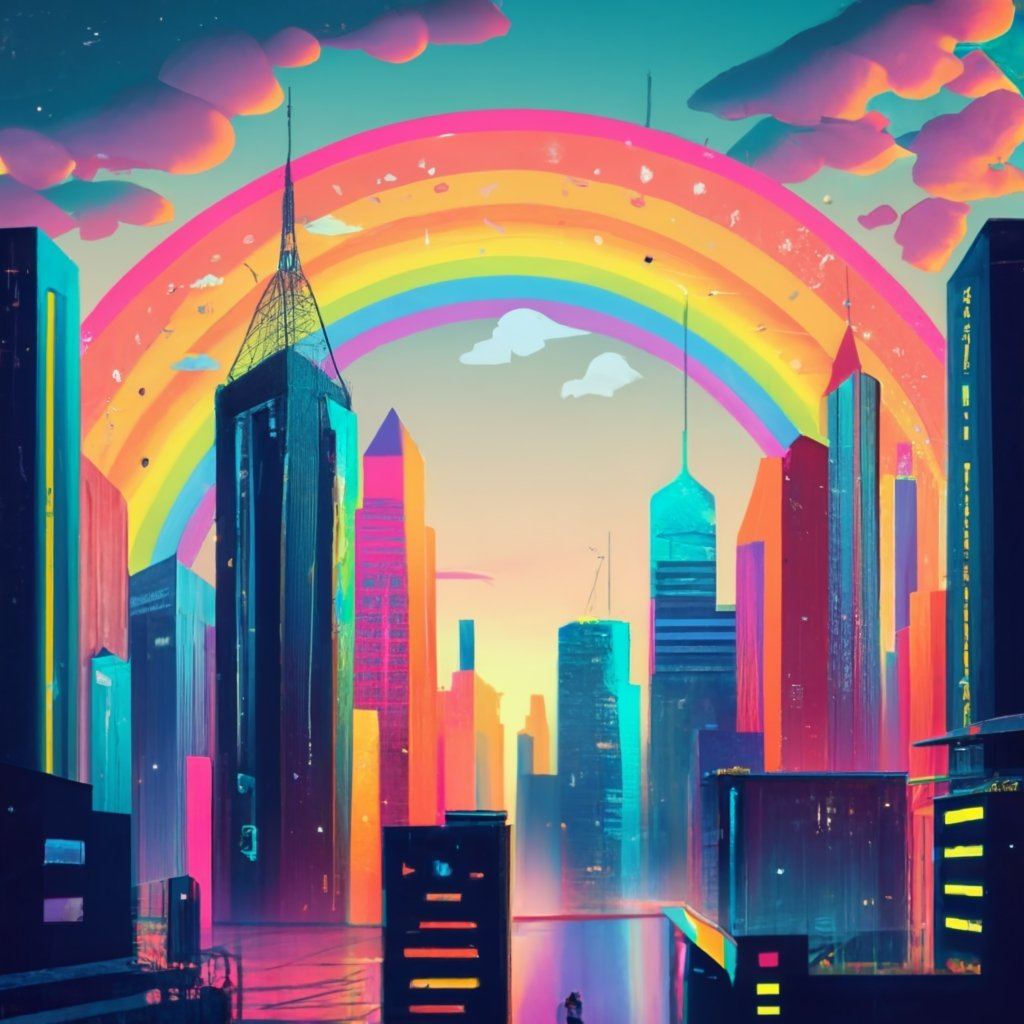

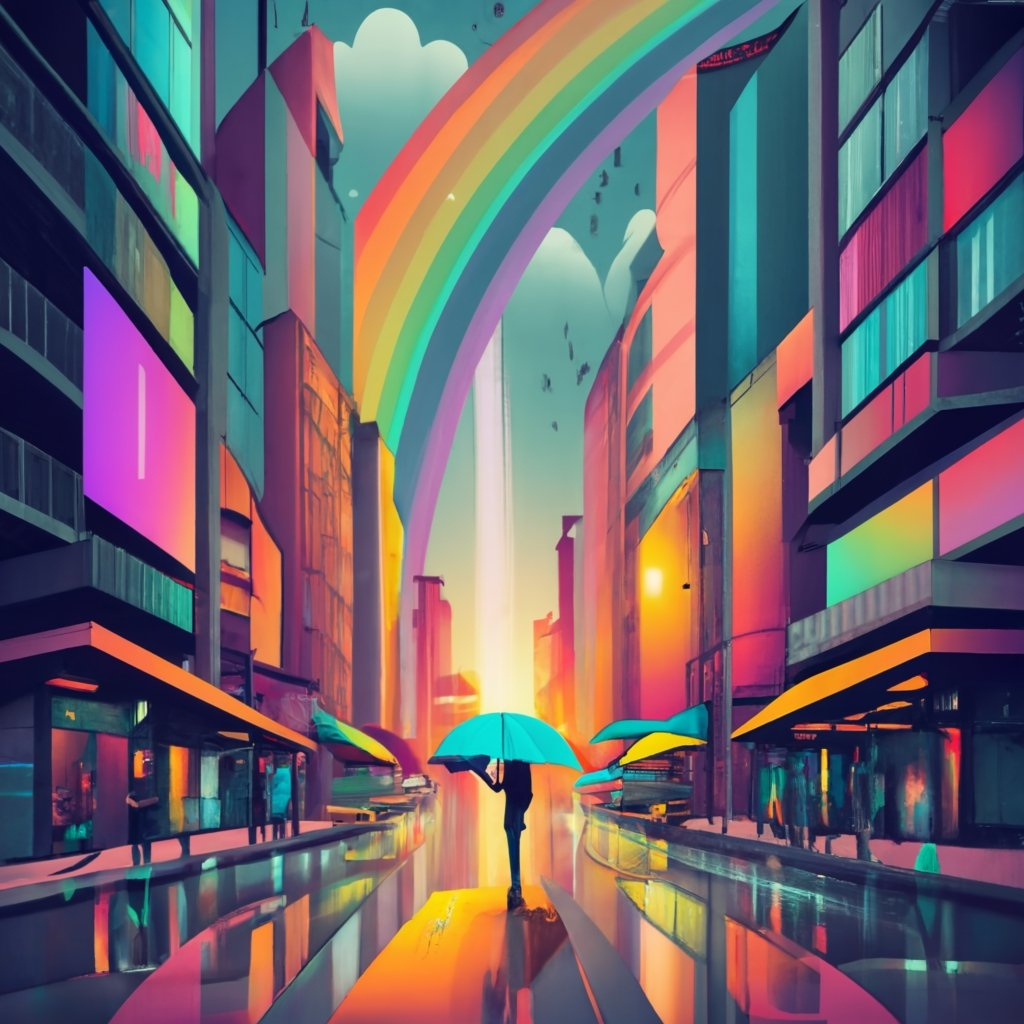